In [1]:
import MySQLdb
from star_match import star_match

In [2]:
conn = MySQLdb.connect("uvbys", "uvbys", "uvbySurvey", "survey")
cur = conn.cursor()

In [3]:
sql = "select * from FileOverlap limit 10"
cur.execute(sql)

10L

In [4]:
tb = cur.fetchall()

In [8]:
f1 = tb[5][1]
f2 = tb[5][2]

In [9]:
f1,f2

('7198N0010', '7246N0039')

In [11]:
sql = "select starsn, radeg, decdeg from Stars where fileid = '%s'" % f1
cur.execute(sql)
tb1 = cur.fetchall()

In [12]:
sql = "select starsn, radeg, decdeg from Stars where fileid = '%s'" % f2
cur.execute(sql)
tb2 = cur.fetchall()

In [13]:
len(tb1),len(tb2)

(5356, 2626)

In [21]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
list_a, list_b = tb1, tb2
a_ra, a_dec, b_ra, b_dec = 1,2,1,2

In [16]:
    len_a = len(list_a)
    len_b = len(list_b)

In [19]:
    ra_a = np.array([k[a_ra] for k in list_a])
    dec_a = np.array([k[a_dec] for k in list_a])
    ra_b = np.array([k[b_ra] for k in list_b])
    dec_b = np.array([k[b_dec] for k in list_b])

In [22]:
    ra_scale = np.cos(np.median(dec_a) / 180.0 * np.pi)

(array([ 286.,  291.,  314.,  310.,  315.,  232.,  228.,  212.,  236.,  202.]),
 array([ 19.352031 ,  19.4814704,  19.6109098,  19.7403492,  19.8697886,
         19.999228 ,  20.1286674,  20.2581068,  20.3875462,  20.5169856,
         20.646425 ]),
 <a list of 10 Patch objects>)

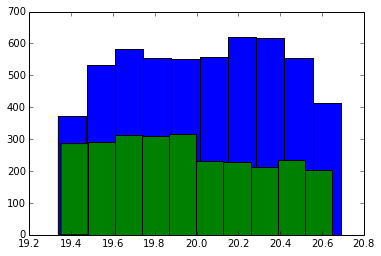

In [25]:
plt.hist(dec_a)
plt.hist(dec_b)

In [26]:
    ix_a = np.argsort(dec_a)
    ix_b = np.argsort(dec_b)

In [35]:
dis_limit = 0.002
dis_limit * 3600

7.2

In [62]:
    out_a , out_b = [] , []
    pbf = pbt = 0  # point b from/to
    for pa in range(len_a) :
        ix_pa = ix_a[pa]
        ra_p, dec_p = ra_a[ix_pa], dec_a[ix_pa]
        # pb walk down to first position [pbf]>=[pa]-dis, [pbt]>=[pa]+dis
        while pbf < len_b and dec_b[ix_b[pbf]] < dec_p - dis_limit : pbf += 1
        while pbt < len_b and dec_b[ix_b[pbt]] < dec_p + dis_limit : pbt += 1
        # exit if p2f runout
        if pbf >= len_b : break
        # skip if no near star
        if pbt - pbf < 1 : continue
        # check real distance, include ra
        for ix_pb in ix_b[range(pbf, pbt)] :
            dis = np.sqrt(((ra_p - ra_b[ix_pb]) * ra_scale) ** 2 + (dec_p - dec_b[ix_pb]) ** 2)
            if dis < dis_limit :
                out_a.append(ix_pa)
                out_b.append(ix_pb)


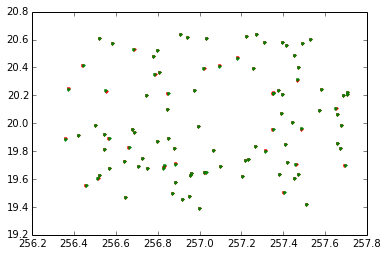

In [63]:
plt.plot(ra_a[out_a], dec_a[out_a], 'r.')
plt.plot(ra_b[out_b], dec_b[out_b], 'g.')

In [64]:
cur.close()
conn.close()